In [203]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
german_credit_df=pd.read_csv("C:/Users/Youniz/Documents/German_Credit.csv")

In [204]:
german_credit_df.describe()

,Month Duration,Credit amount,Installment rate,Present residence since,Age in years,existing credits,people liable,Class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [205]:
german_credit_df.isnull().sum().sort_values(ascending=False)

Class                         0
Other debtors / guarantors    0
Month Duration                0
Credit history                0
Loan Purpose                  0
Credit amount                 0
Savings account/bonds         0
Present employment since      0
Installment rate              0
Personal status and sex       0
Present residence since       0
foreign worker                0
Property                      0
Age in years                  0
Other installment plans       0
Housing                       0
existing credits              0
Job                           0
people  liable                0
Telephone                     0
checking account              0
dtype: int64

* We do not have any missing values

In [206]:
categorical = german_credit_df.select_dtypes(['object'])
categorical.columns

Index(['checking account', 'Credit history', 'Loan Purpose',
       'Savings account/bonds', 'Present employment since',
       'Personal status and sex', 'Other debtors / guarantors', 'Property',
       'Other installment plans', 'Housing', 'Job', 'Telephone',
       'foreign worker'],
      dtype='object')

In [207]:
numeric = german_credit_df.dtypes[german_credit_df.dtypes != "object"].index
numeric

Index(['Month Duration', 'Credit amount', 'Installment rate',
       'Present residence since', 'Age in years', 'existing credits',
       'people  liable', 'Class'],
      dtype='object')

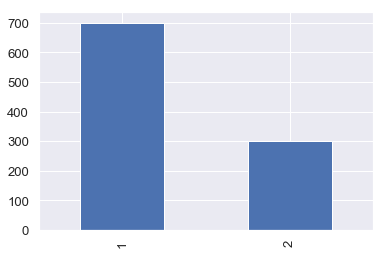

In [208]:
german_credit_df["Class"].value_counts().plot.bar()
percent=german_credit_df["Class"].value_counts()*100/german_credit_df["Class"].count()
plt.show()

In [209]:
percent

1    70.0
2    30.0
Name: Class, dtype: float64

* the data is an imbalanced data 

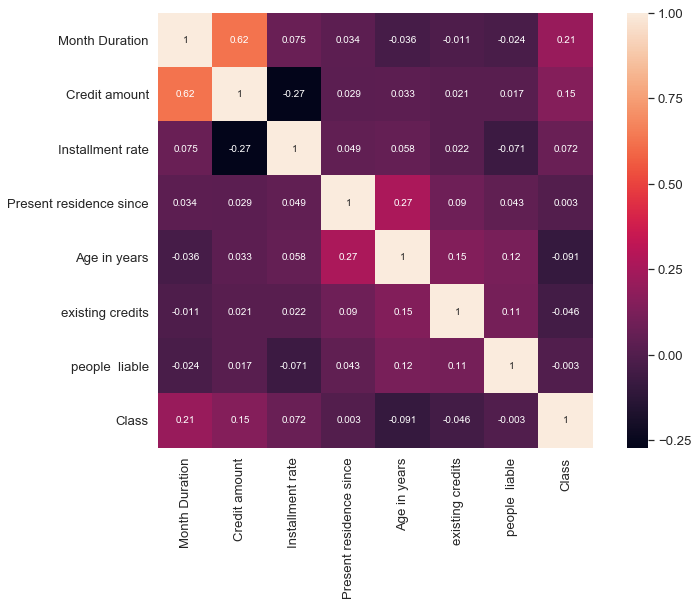

In [210]:
corr = german_credit_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, vmax=1,annot=True, square=True)
plt.show()

We are converting the columns values of the data . So that we can understand the data much better.

In [211]:
german_credit_df['checking account'] = german_credit_df['checking account'].map({'A11': " Less than 0DM", 'A12':"0 to 200DM",'A13':"Above 200DM",'A14':"No Account"})

german_credit_df['Credit history'] = german_credit_df['Credit history'].map({'A30': "no credits taken/ all credits paid back duly", 'A31':"all credits at this bank paid back duly",'A32':"existing credits paid back duly till now",'A33':"delay in paying off in the past",'A34':"critical account/ other credits existing (not at this bank)"})

german_credit_df['Savings account/bonds'] = german_credit_df['Savings account/bonds'].map({'A61': "Below 100DM", 'A62':"100 to 500DM",'A63':"500 to 1000 DM",'A64':"Above 1000DM",'A65':"no savings account"})

german_credit_df['Loan Purpose'] = german_credit_df['Loan Purpose'].map({'A40': "car(new)", 'A41':"car(used)",'A42':"furniture/equipment",'A43':"radio/television",'A44':"domestic appliances", 'A45':"repairs",'A46':"education",'A47':"vacation",'A48':"retraining",'A49':"business",'A410':"others"})

german_credit_df['Present employment since'] = german_credit_df['Present employment since'].map({'A71': "unemployed", 'A72':"Below 1YR",'A73':"1 to 4 YRS",'A74':"4 to 7 YRS",'A75':"Above 7 YRS"})

german_credit_df['Personal status and sex'] = german_credit_df['Personal status and sex'].map({'A91': "male : divorced/separated", 'A92':"female:divorced/separated/married",'A93':"male : single",'A94':"male : married/widowed",'A95':"female : single"})


german_credit_df['Other debtors / guarantors'] = german_credit_df['Other debtors / guarantors'].map({'A101': "none", 'A102':"co-applicant",'A103':"guarantor"})

german_credit_df['Property'] = german_credit_df['Property'].map({'A121': "real estate", 'A122':"building society savings agreement",'A123':"car or other",'A124':"No property"})


german_credit_df['Other installment plans'] = german_credit_df['Other installment plans'].map({'A141': "bank", 'A142':"stores",'A143':"none"})

german_credit_df['Housing'] = german_credit_df['Housing'].map({'A151': "rent", 'A152':"own",'A153':"for free"})


german_credit_df['Job'] = german_credit_df['Job'].map({'A171': "unemployed/ unskilled - non-resident", 'A172':"unskilled - resident",'A173':"skilled employee/official",'A174':"self-employed/highly qualified employee"})


german_credit_df['Telephone'] = german_credit_df['Telephone'].map({'A191': "Not registered", 'A192':"registered"})


german_credit_df['foreign worker'] = german_credit_df['foreign worker'].map({'A201': "Yes", 'A202':"No"})

german_credit_df = german_credit_df.replace({'Class': {1:"Yes", 2:"No"}})




In [212]:
german_credit_df = german_credit_df.replace({'Class': {"Yes":0, "No":1}})

In [213]:
german_credit_df.head()

,checking account,Month Duration,Credit history,Loan Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,existing credits,Job,people liable,Telephone,foreign worker,Class
0,Less than 0DM,6,critical account/ other credits existing (not ...,radio/television,1169,no savings account,Above 7 YRS,4,male : single,none,...,real estate,67,none,own,2,skilled employee/official,1,registered,Yes,0
1,0 to 200DM,48,existing credits paid back duly till now,radio/television,5951,Below 100DM,1 to 4 YRS,2,female:divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee/official,1,Not registered,Yes,1
2,No Account,12,critical account/ other credits existing (not ...,education,2096,Below 100DM,4 to 7 YRS,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,Not registered,Yes,0
3,Less than 0DM,42,existing credits paid back duly till now,furniture/equipment,7882,Below 100DM,4 to 7 YRS,2,male : single,guarantor,...,building society savings agreement,45,none,for free,1,skilled employee/official,2,Not registered,Yes,0
4,Less than 0DM,24,delay in paying off in the past,car(new),4870,Below 100DM,1 to 4 YRS,3,male : single,none,...,No property,53,none,for free,2,skilled employee/official,2,Not registered,Yes,1


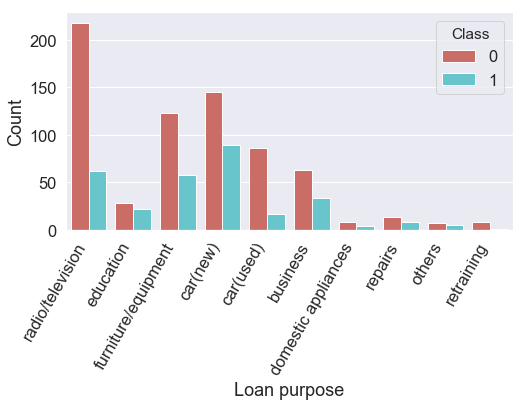

In [214]:
sns.set(font_scale=1.50) 
plt.figure(figsize=(8,4))
ax=sns.countplot(x="Loan Purpose", data=german_credit_df, palette="hls",hue="Class")
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")    
plt.ylabel("Count")
plt.xlabel("Loan purpose")
plt.show()

* Top reason or purpose for getting an loan is for Radio/Television, followed by New car and Furniture.

* *Applicants who get loans for the purpose of new car mostly fail to repay the loans.

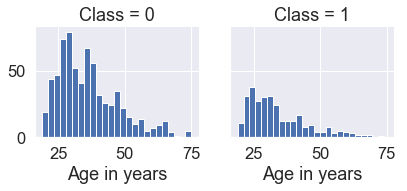

In [215]:
#german_credit_df["Age in years"]=pd.cut((german_credit_df["Age in years"]),3, labels=["below37", "37 to 55 Yrs", "above 55"])
#pd.crosstab(german_credit_df["Age in years"],german_credit_df["Class"])
g = sns.FacetGrid(german_credit_df, col='Class')
g.map(plt.hist, 'Age in years', bins=25)

* Applicants age below 40 get more loans and half of them fail to repay their loans 

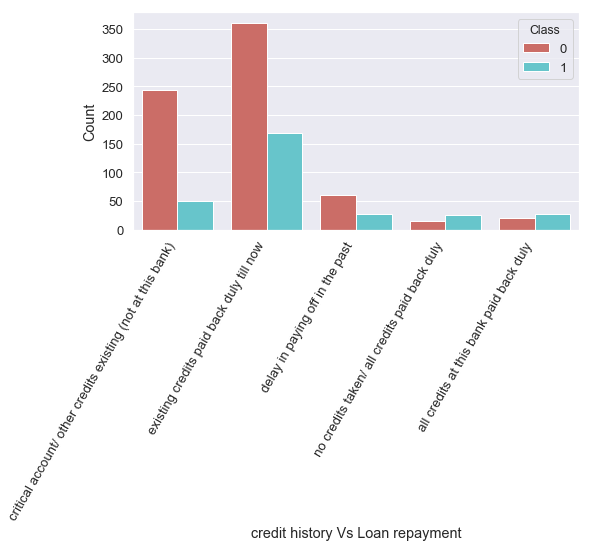

In [216]:
sns.set(font_scale=1.20) 
plt.figure(figsize=(8,4))
ax=sns.countplot(x="Credit history", data=german_credit_df, palette="hls",hue="Class")
ax.set_xticklabels(ax.get_xticklabels(),rotation=60,ha="right")    
plt.ylabel("Count")
plt.xlabel("credit history Vs Loan repayment")
plt.show()

**People  with no credits taken/ all credits paid back duly and people with all credits at this bank paid back duly have high rate of bad loans.

**On the contrast we find people who have critical account and other existing credits have very less rate of Bad loans.


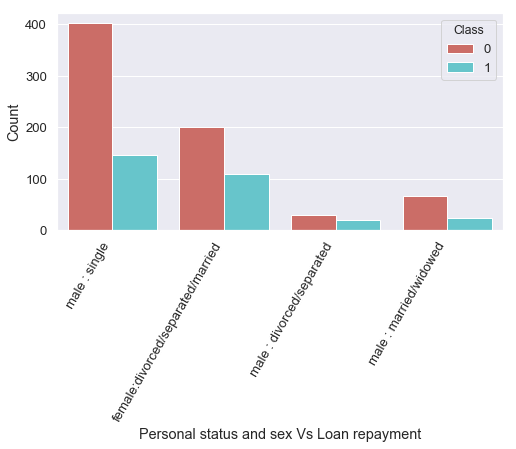

In [217]:
sns.set(font_scale=1.20) 
plt.figure(figsize=(8,4))
ax=sns.countplot(x="Personal status and sex", data=german_credit_df, palette="hls",hue="Class")
ax.set_xticklabels(ax.get_xticklabels(),rotation=60,ha="right")    
plt.ylabel("Count")
plt.xlabel("Personal status and sex Vs Loan repayment")
plt.show()

** Applicants who are male and single have took more loans and also have high bad loans rate , followed by applicants who are female and married/divorced.

** We dont find any applicant who is female and single.


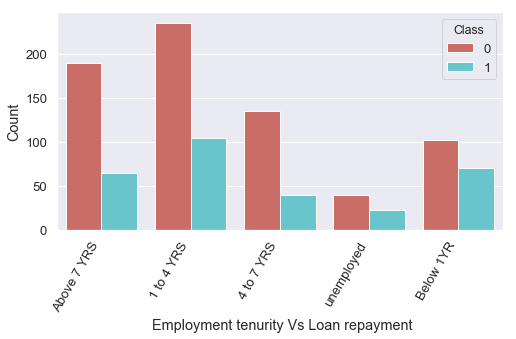

In [218]:
sns.set(font_scale=1.20) 
plt.figure(figsize=(8,4))
ax=sns.countplot(x="Present employment since", data=german_credit_df, palette="hls",hue="Class")
ax.set_xticklabels(ax.get_xticklabels(),rotation=60,ha="right")    
plt.ylabel("Count")
plt.xlabel(" Employment tenurity Vs Loan repayment")
plt.show()

** Applicants who have worked less than 1 year have high bad loans rate.

** People who have 1 to 4 yrs of work exp have took more loans and nearly half of them fail to repay it back.

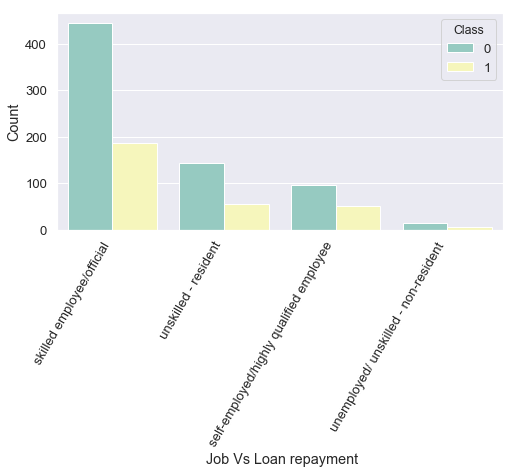

In [219]:
sns.set(font_scale=1.20) 
plt.figure(figsize=(8,4))
ax=sns.countplot(x="Job", data=german_credit_df, palette="Set3",hue="Class")
ax.set_xticklabels(ax.get_xticklabels(),rotation=60,ha="right")    
plt.ylabel("Count")
plt.xlabel(" Job Vs Loan repayment")
plt.show()

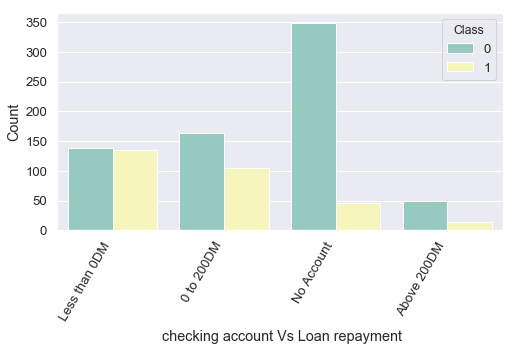

In [220]:
sns.set(font_scale=1.20) 
plt.figure(figsize=(8,4))
ax=sns.countplot(x="checking account", data=german_credit_df, palette="Set3",hue="Class")
ax.set_xticklabels(ax.get_xticklabels(),rotation=60,ha="right")    
plt.ylabel("Count")
plt.xlabel(" checking account Vs Loan repayment")
plt.show()

*People who have no account get more loans.

*We have high bad loans rate for applicants who have less than 0Dm followed by 0 to 200 DM.

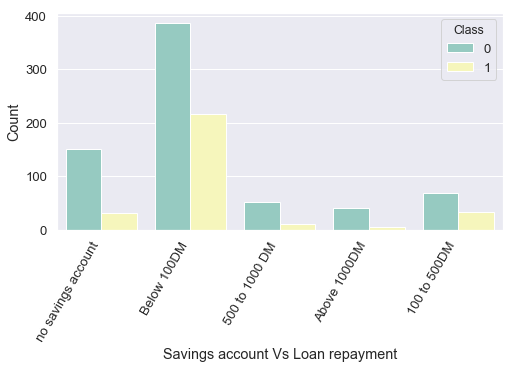

In [221]:
sns.set(font_scale=1.20) 
plt.figure(figsize=(8,4))
ax=sns.countplot(x="Savings account/bonds", data=german_credit_df, palette="Set3",hue="Class")
ax.set_xticklabels(ax.get_xticklabels(),rotation=60,ha="right")    
plt.ylabel("Count")
plt.xlabel("Savings account Vs Loan repayment")
plt.show()

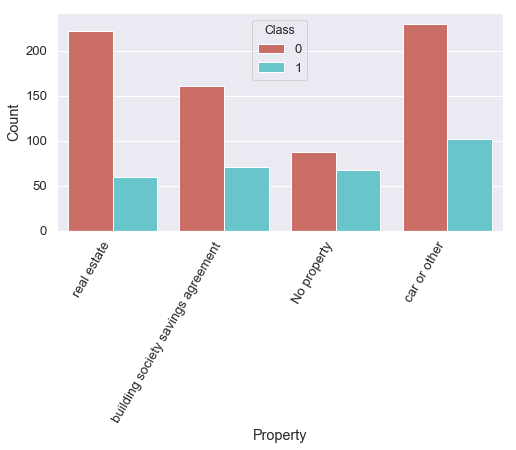

In [222]:
sns.set(font_scale=1.20) 
plt.figure(figsize=(8,4))
ax=sns.countplot(x="Property", data=german_credit_df, palette="hls",hue="Class")
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")    
plt.ylabel("Count")
plt.xlabel("Property")
plt.show()

*People who have  No property mostly fail to repay the loans.

*Applicants who have any real estate property or Car get more loans.

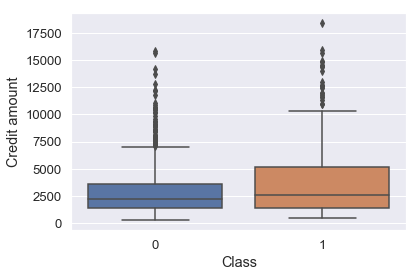

In [223]:
sns.boxplot(german_credit_df["Class"],german_credit_df["Credit amount"],data=german_credit_df)

*Applicants Who have bad loan tend to have high Credit amount as For class 2 the 75 and 100 percentile are more than 5000 compared to class1.

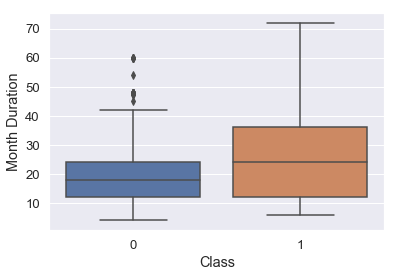

In [224]:
sns.boxplot(german_credit_df["Class"],german_credit_df["Month Duration"],data=german_credit_df)

*Applicants Who have bad loan also tend to have high Month duration.

We can find that for class 2 median,75,100 percentile are far higher compared to good loans .

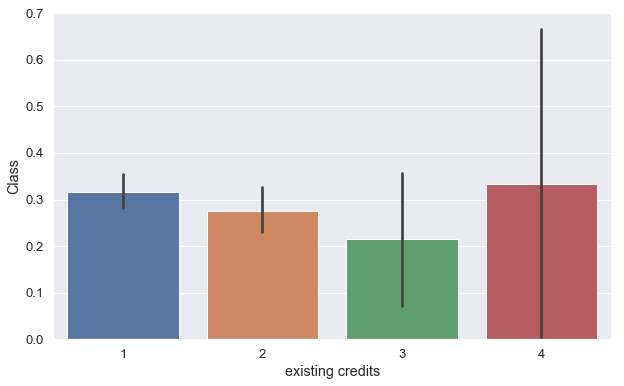

In [225]:
plt.figure(figsize=(10,6))
h=sns.barplot(x="existing credits",y="Class",data=german_credit_df)

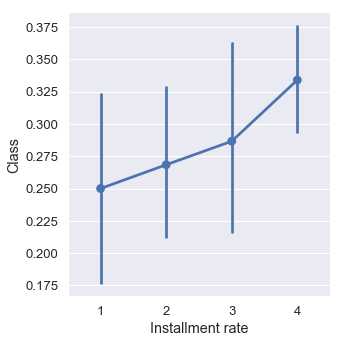

In [226]:
g=sns.catplot(x="Installment rate",y="Class",data=german_credit_df,kind='point')


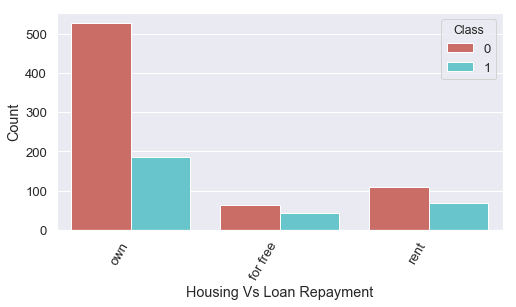

In [227]:
sns.set(font_scale=1.20) 
plt.figure(figsize=(8,4))
ax=sns.countplot(x="Housing", data=german_credit_df, palette="hls",hue="Class")
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")    
plt.ylabel("Count")
plt.xlabel("Housing Vs Loan Repayment")
plt.show()

In [228]:
german_credit_df.shape

(1000, 21)

In [229]:
german_credit_df=pd.get_dummies(german_credit_df)

In [230]:
german_credit_df.shape

(1000, 62)

In [231]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split 
from sklearn.cross_validation import KFold 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report,precision_score
import xgboost as xgb

In [232]:
features=german_credit_df.drop(["Class"],axis=1)
labels=german_credit_df["Class"]
features_train,features_test,labels_train,labels_test=train_test_split(features,labels,test_size=0.3,random_state=0)

In [233]:
def model(model,features_train,features_test,labels_train,labels_test):
    model.fit(features_train,labels_train.values.ravel())
    pred=model.predict(features_test)
    cnf_mtrx=confusion_matrix(labels_test,pred)
    print("the recall for this model is :",cnf_mtrx[1,1]/(cnf_mtrx[1,1]+cnf_mtrx[1,0]))
    print("the precision for this model is :",cnf_mtrx[1,1]/(cnf_mtrx[1,1]+cnf_mtrx[0,1]))
    fig= plt.figure(figsize=(5,4))
    sns.heatmap(cnf_mtrx,annot=True,cmap="RdBu_r",fmt="d",linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print(classification_report(labels_test,pred))

the recall for this model is : 0.53488372093
the precision for this model is : 0.55421686747


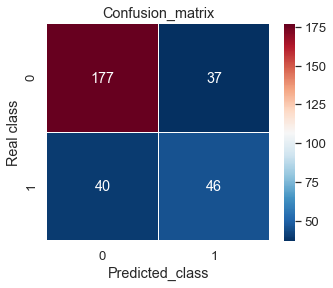

             precision    recall  f1-score   support

          0       0.82      0.83      0.82       214
          1       0.55      0.53      0.54        86

avg / total       0.74      0.74      0.74       300



In [234]:
clf=LogisticRegression()

model(clf,features_train,features_test,labels_train,labels_test)

the recall for this model is : 0.46511627907
the precision for this model is : 0.645161290323


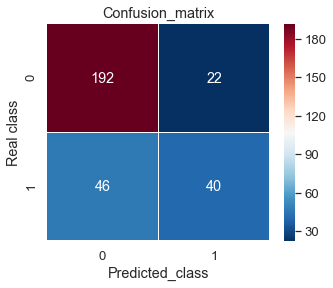

             precision    recall  f1-score   support

          0       0.81      0.90      0.85       214
          1       0.65      0.47      0.54        86

avg / total       0.76      0.77      0.76       300



In [235]:
clf1= RandomForestClassifier(n_estimators=100)

model(clf1,features_train,features_test,labels_train,labels_test)

We have did classification on an imbalanced data , but we got very poor predictions.
to solve this problem we can do over sampling technique called SMOTE.
This technique will create a balance between th classes.So we can have better results. 

In [236]:
os = SMOTE(random_state=0) #   We are using SMOTE as the function for oversampling

os_data_X,os_data_y=os.fit_sample(features,labels)

os_data_X = pd.DataFrame(data=os_data_X,columns=features.columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=["Class"])
features_train1,features_test1,labels_train1,labels_test1=train_test_split(os_data_X,os_data_y,test_size=0.3,random_state=0)

We will try different algorthim to see which performs better.

the recall for this model is : 0.697674418605
the precision for this model is : 0.735294117647


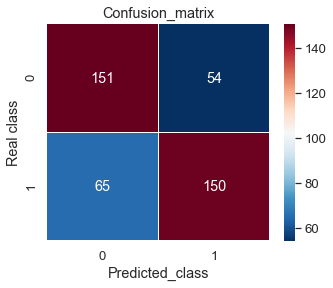

             precision    recall  f1-score   support

          0       0.70      0.74      0.72       205
          1       0.74      0.70      0.72       215

avg / total       0.72      0.72      0.72       420



In [237]:
log_clf=LogisticRegression()
model(log_clf,features_train1,features_test1,labels_train1,labels_test1)

the recall for this model is : 0.758139534884
the precision for this model is : 0.876344086022


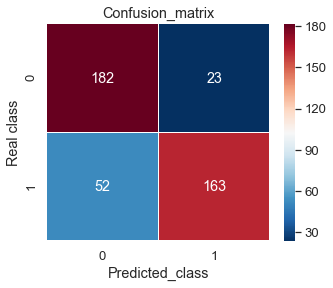

             precision    recall  f1-score   support

          0       0.78      0.89      0.83       205
          1       0.88      0.76      0.81       215

avg / total       0.83      0.82      0.82       420



In [238]:
clf1= RandomForestClassifier(n_estimators=100)

model(clf1,features_train1,features_test1,labels_train1,labels_test1)

the recall for this model is : 0.795348837209
the precision for this model is : 0.855


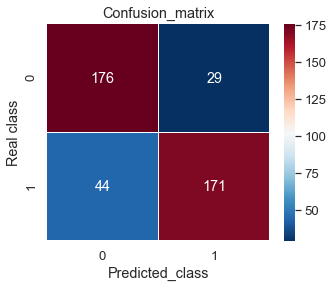

             precision    recall  f1-score   support

          0       0.80      0.86      0.83       205
          1       0.85      0.80      0.82       215

avg / total       0.83      0.83      0.83       420



In [239]:
gb = GradientBoostingClassifier()
model(gb,features_train1,features_test1,labels_train1,labels_test1)


the recall for this model is : 0.827906976744
the precision for this model is : 0.738589211618


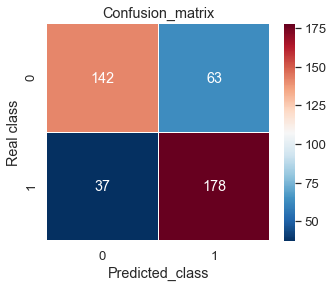

             precision    recall  f1-score   support

          0       0.79      0.69      0.74       205
          1       0.74      0.83      0.78       215

avg / total       0.77      0.76      0.76       420



In [240]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
model(nb,features_train1,features_test1,labels_train1,labels_test1)

the recall for this model is : 0.786046511628
the precision for this model is : 0.853535353535


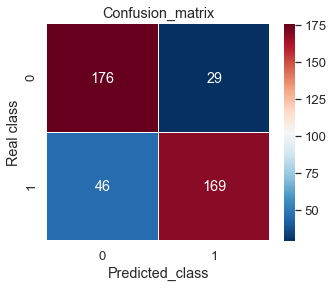

             precision    recall  f1-score   support

          0       0.79      0.86      0.82       205
          1       0.85      0.79      0.82       215

avg / total       0.82      0.82      0.82       420



In [241]:
xgb_clf =xgb.XGBClassifier()

model(xgb_clf,features_train1,features_test1,labels_train1,labels_test1)

the recall for this model is : 0.395348837209
the precision for this model is : 0.752212389381


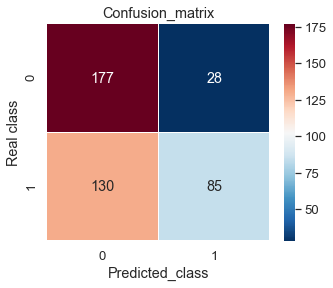

             precision    recall  f1-score   support

          0       0.58      0.86      0.69       205
          1       0.75      0.40      0.52       215

avg / total       0.67      0.62      0.60       420



In [282]:
from sklearn.svm import SVC
svc_clf = SVC(gamma='auto')
model(svc_clf,features_train1,features_test1,labels_train1,labels_test1)

the recall for this model is : 0.804651162791
the precision for this model is : 0.81990521327


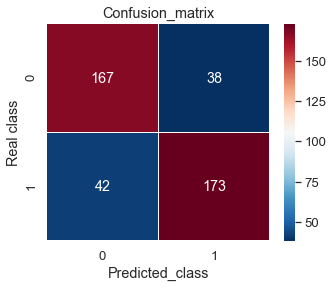

             precision    recall  f1-score   support

          0       0.80      0.81      0.81       205
          1       0.82      0.80      0.81       215

avg / total       0.81      0.81      0.81       420



In [283]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf=AdaBoostClassifier()
model(ada_clf,features_train1,features_test1,labels_train1,labels_test1)

the recall for this model is : 0.590697674419
the precision for this model is : 0.587962962963


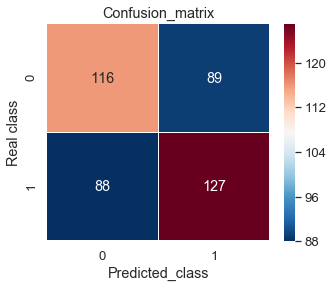

             precision    recall  f1-score   support

          0       0.57      0.57      0.57       205
          1       0.59      0.59      0.59       215

avg / total       0.58      0.58      0.58       420



In [243]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
model(neigh,features_train1,features_test1,labels_train1,labels_test1)

** We trained seven different algorthims and we have some good results after doing SMOTE .
Below three have better resuls compared to other algorthims.
*Random forest 
*Gradient Boosting
*XGboost

We will try to tune the top 2 Algorthims hyperparamters to increase the model performance.


In [244]:
# to plot the Roc curve
def roc_crve(clf,features_train1,features_test1,labels_train1,labels_test1):

    clf.fit(features_train1,labels_train1.values.ravel())
    pred=clf.predict(features_test1)

    fpr, tpr, thresholds = roc_curve(labels_test1.values.ravel(),pred)
    roc_auc = auc(fpr,tpr)

    # Plot ROC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

from sklearn.metrics import make_scorer, accuracy_score
n1_estimators = [10, 50, 100]
max1_features = ["auto","sqrt","log2"]
min1_sample_leaf = [1,5,10,50,100,200,500]
n1_jobs = [-1,1]
random_state=1
oob_score = True
# Choose some parameter combinations to try
parameters={"n_estimators":n1_estimators,"max_features":max1_features,"min_samples_leaf":min1_sample_leaf,"n_jobs":n1_jobs}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)
clf1= RandomForestClassifier()
# Run the grid search
grid_obj = GridSearchCV(clf1,parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(features,labels)

grid_obj.best_params_


{'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 100,
 'n_jobs': 1}

the recall for this model is : 0.776744186047
the precision for this model is : 0.902702702703


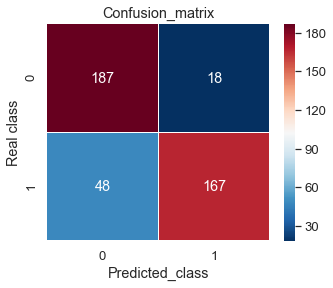

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       205
          1       0.90      0.78      0.84       215

avg / total       0.85      0.84      0.84       420



In [259]:
model_clf1= RandomForestClassifier(n_estimators = 100, oob_score = True, n_jobs = 1,random_state =1,
                                  max_features = "sqrt", min_samples_leaf = 1)
model(model_clf1,features_train1,features_test1,labels_train1,labels_test1)

After tuning the hyperparameters we have a slight increase in model performance.

Next We will plot the Roc_curve.

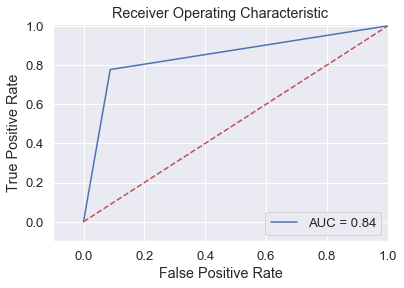

In [257]:
roc_crve(model_clf1,features_train1,features_test1,labels_train1,labels_test1)

In [246]:

learning_rate1=[.01, .03, .05, .1, .25]
n_estimators1=[10, 50, 100, 300]
max_depth1=[2, 4, 6, 8, 10, None]
random_state=[0]
parameters={"learning_rate":learning_rate1,"n_estimators":n_estimators1,"max_depth":max_depth1} 
# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)
gb = GradientBoostingClassifier()
# Run the grid search
grid_obj = GridSearchCV(gb,parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(features,labels)

grid_obj.best_params_

             

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300}

the recall for this model is : 0.790697674419
the precision for this model is : 0.85


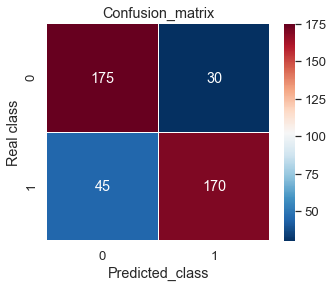

             precision    recall  f1-score   support

          0       0.80      0.85      0.82       205
          1       0.85      0.79      0.82       215

avg / total       0.82      0.82      0.82       420



In [255]:
gb1 = GradientBoostingClassifier(learning_rate=0.05,n_estimators =300,max_depth=4,random_state=0)

model(gb1,features_train1,features_test1,labels_train1,labels_test1)

After tuning the hyperparameters we have a slight increase in model performance.

Next We will plot the Roc_curve.

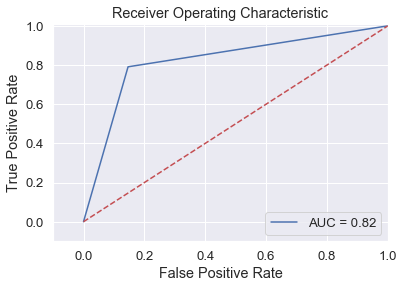

In [258]:
roc_crve(gb1,features_train1,features_test1,labels_train1,labels_test1)

We can run a 5 fold cross validition just to verify whether how the model is performing with different folds and also to use the entire dat

In [260]:

def run_kfold(clf,X_all,y_all):
    kf = KFold(1400, n_folds=5,shuffle=True)
    outcomes = []
    precision_outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        y_train, y_test = y_all.values[train_index].ravel(), y_all.values[test_index].ravel()
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        recall_accur=recall_score(y_test, predictions)
        precision_accur=precision_score(y_test, predictions)
        outcomes.append(recall_accur)
        precision_outcomes.append(precision_accur)        
    mean_outcome = np.mean(outcomes)
    precision_mean_outcome = np.mean(precision_outcomes)
    print("Mean recall: {0}".format(mean_outcome)) 
    print("Mean precision: {0}".format(precision_mean_outcome))

In [261]:
#Gradient Boosting
run_kfold(gb1,os_data_X,os_data_y)

Mean recall: 0.8048210697076248
Mean precision: 0.8621193590331753


In [262]:
#Random Forest
run_kfold(model_clf1,os_data_X,os_data_y)

Mean recall: 0.7810521951114574
Mean precision: 0.8801221334632308


In [270]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#convert it to numpy arrays
X=os_data_X.values

#Scaling the values
X = scale(X)

pca = PCA(n_components=61)

VAL=pca.fit(X)

dataPCA =VAL.transform(X)

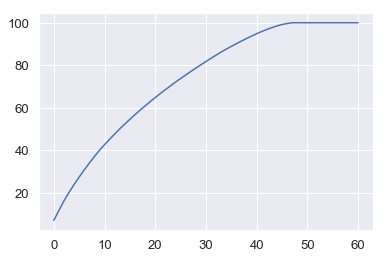

In [271]:
var= pca.explained_variance_ratio_

var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)

In [273]:
pca1 = PCA(n_components=45)

VAL=pca1.fit(X)

dataPCA1 =VAL.transform(X)

In [266]:
dataPCA1 = pd.DataFrame(data=dataPCA1 )

In [274]:
features_train3,features_test3,labels_train3,labels_test3=train_test_split(dataPCA1,os_data_y,test_size=0.3,random_state=0)


After doing PCA we hav reduced the features from 62  to 45. With 45 features we are getting the maximum variance.We will now check the results with PCA data.


the recall for this model is : 0.818604651163
the precision for this model is : 0.818604651163


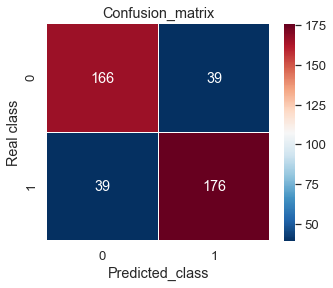

             precision    recall  f1-score   support

          0       0.81      0.81      0.81       205
          1       0.82      0.82      0.82       215

avg / total       0.81      0.81      0.81       420



In [275]:
model(model_clf1,features_train3,features_test3,labels_train3,labels_test3)

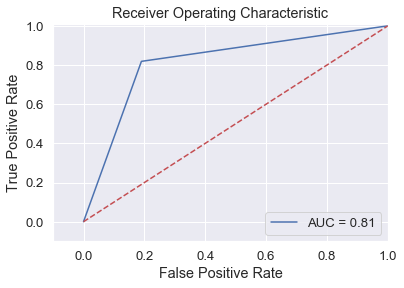

In [276]:
roc_crve(model_clf1,features_train3,features_test3,labels_train3,labels_test3)

We do not find much greater results after PCA.
Finally we will Do a simple Voting Ensemble method to check whether we get better results.

the recall for this model is : 0.786046511628
the precision for this model is : 0.862244897959


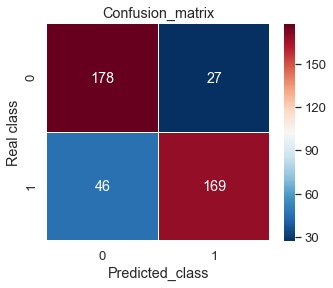

             precision    recall  f1-score   support

          0       0.79      0.87      0.83       205
          1       0.86      0.79      0.82       215

avg / total       0.83      0.83      0.83       420



In [291]:
votingC = VotingClassifier(estimators=[("nb",nb),('ada',ada_clf),('xgb',xgb_clf),("gb",gb1),("ran_frst",model_clf1)], voting='hard', n_jobs=4)
model(votingC,features_train1,features_test1,labels_train1,labels_test1)


In [288]:
run_kfold(votingC,os_data_X,os_data_y)

Mean recall: 0.814652040883384
Mean precision: 0.8490339259809424


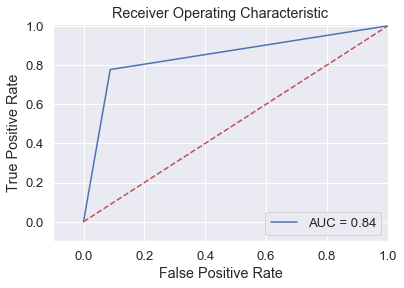

In [289]:
roc_crve(model_clf1,features_train1,features_test1,labels_train1,labels_test1)

We Find the same results after doing a voting Ensemble.